## Setup

In [11]:
# automatic module reload
%load_ext autoreload
%autoreload 2

%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from pathlib import Path
import re
import scipy
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d
from scipy import stats

import signal_analysis_functions_cellculture as s


In [13]:
notebook_dir = Path().resolve()
os.chdir(notebook_dir)

checked_files=glob.glob('data/cell_culture/passed_quality_control/*.csv') #only recordings with little/no baseline drift
ACSF_wo_technical_issues=glob.glob('data/cell_culture/ACSF_wo_technical_issues/*.csv')
PBS_files=glob.glob('data/cell_culture/PBS/*.csv')

metadata='data/cell_culture/metadata_and_analysis.ods'

In [18]:
df_metadata=s.make_df_metadata(metadata)

## Activity analysis

In [5]:
params_min = {
    'height_threshold': 0, 
    'prominence_threshold': 2, # as standard deviation
    'min_peak_distance_sec': 1,
    'min_width_sec': 1,
    'max_width_sec': 200
}


In [6]:
df_frequency_analysis_checked_strict=s.make_df_frequency_analysis_all (checked_files, df_metadata, params=params_min)
df_frequency_analysis_ACSF_checked=s.make_df_frequency_analysis_all (ACSF_wo_technical_issues, df_metadata, params=params_min)
df_frequency_analysis_PBS=s.make_df_frequency_analysis_all (PBS_files, df_metadata, params=params_min)


In [ ]:
# visualize peak detection
for file in ACSF_wo_technical_issues:    
    plot, peaks_list = s.plot_peak_analysis(file,df_metadata,params=params_min)
    

### Proportion of active cells

In [7]:
group_order = ['control', 'cocaine']
group_colors = {
    'control': '#2ca02c',    
    'cocaine': '#ff7f0e',      
}

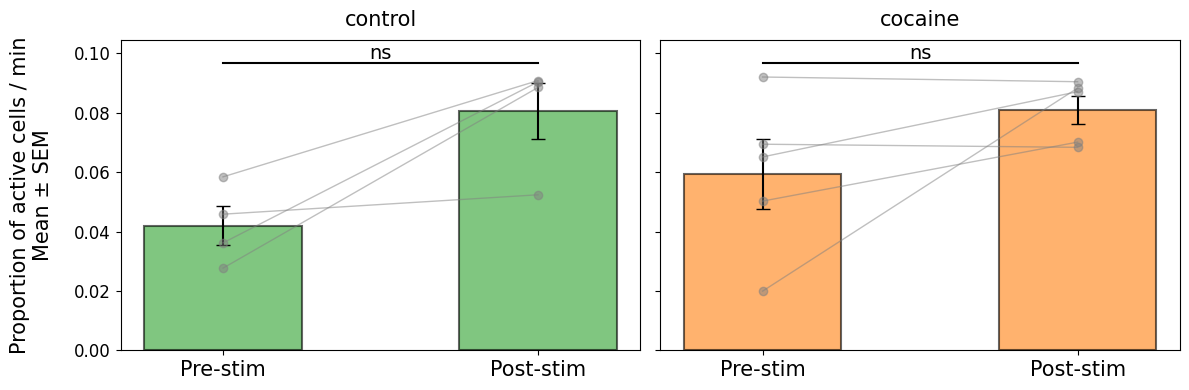

,group,n_recordings,mean_diff,normality,test_used,statistic,p_value,significant
0,control,4,0.038519,True,Paired t-test,3.139002,0.051703,False
1,cocaine,5,0.021522,True,Paired t-test,1.689728,0.166346,False


In [24]:
df_active_cells = df_frequency_analysis_ACSF_checked[df_frequency_analysis_ACSF_checked['responsivity'] != 'inactive']
fig,stats = s.plot_active_cells_comparison_norm(df_active_cells, groupby='treatment', 
                                 figsize=(12, 4), plot_type='proportion',
                                 show_stats=True, normalize_by_time=True, test='ttest_rel',group_order=group_order, group_colors=group_colors)
plt.show()
#fig.savefig('plots/'+'active_components_comparison_cellcultures_ACSF.pdf', bbox_inches='tight', dpi=300)
stats

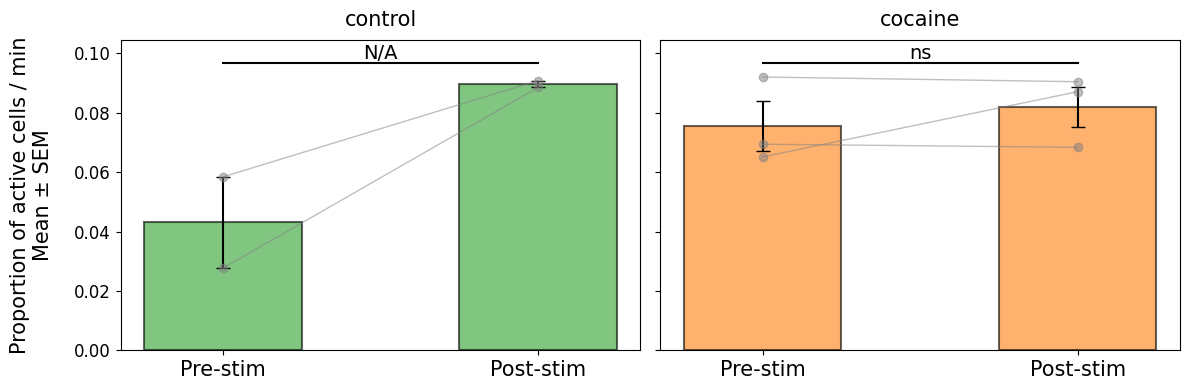

,group,n_recordings,mean_diff,normality,test_used,statistic,p_value,significant
0,control,2,0.046651,N/A (n < 3),N/A (n < 3),NaN,NaN,False
1,cocaine,3,0.006445,False,Paired t-test,0.830005,0.493834,False


In [9]:
# only recordings with less severe/no baseline drift

df_active_cells = df_frequency_analysis_checked_strict[df_frequency_analysis_checked_strict['responsivity'] != 'inactive']
fig,stats = s.plot_active_cells_comparison_norm(df_active_cells, groupby='treatment', 
                                 figsize=(12, 4), plot_type='proportion',
                                 show_stats=True, normalize_by_time=True, test='ttest_rel',group_order=group_order, group_colors=group_colors)
plt.show()
#fig.savefig('plots/'+'active_components_comparison_cellcultures_ACSF_wo_baselinedrift.pdf', bbox_inches='tight', dpi=300)
stats

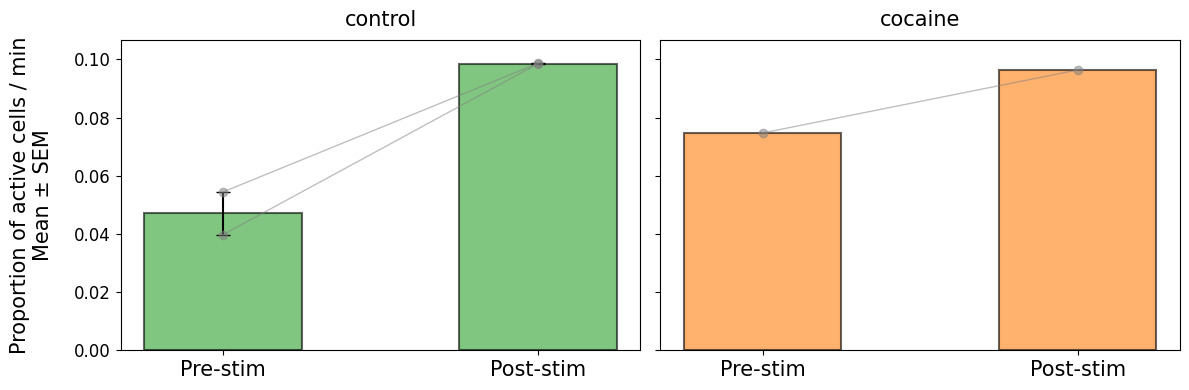

,group,n_recordings,mean_diff,normality,test_used,statistic,p_value,significant
0,control,2,0.051486,N/A (n < 3),N/A (n < 3),NaN,NaN,False
1,cocaine,1,0.021654,N/A (n < 3),N/A (n < 3),NaN,NaN,False


In [26]:
# PBS

df_active_cells = df_frequency_analysis_PBS[df_frequency_analysis_PBS['responsivity'] != 'inactive']
fig,stats = s.plot_active_cells_comparison_norm(df_active_cells, groupby='treatment', 
                                 figsize=(12, 4), plot_type='proportion',
                                 show_stats=True, normalize_by_time=True, test='ttest_rel',group_order=group_order, group_colors=group_colors)
plt.show()
#fig.savefig('plots/'+'active_components_comparison_cellcultures_PBS.pdf', bbox_inches='tight', dpi=300)
stats

### Frequency analysis

In [20]:
group_order = ['control', 'cocaine']
group_colors = {
    'control': '#2ca02c',    
    'cocaine': '#ff7f0e',      
}

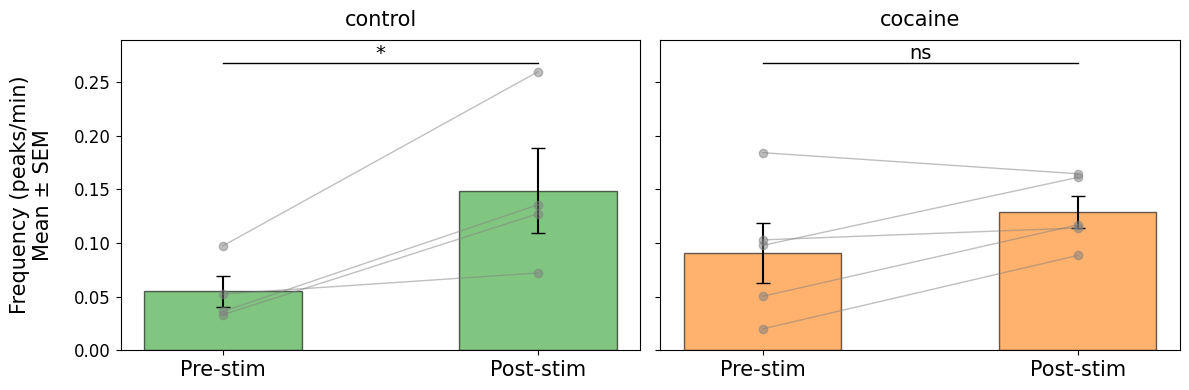

,group,n,mean_diff,normality,test_used,statistic,p_value,significant
0,cocaine,5,0.037965,True,Paired t-test,2.117594,0.101617,False
1,control,4,0.093840,True,Paired t-test,3.216567,0.048712,True


In [21]:

df_active_cells = df_frequency_analysis_ACSF_checked[df_frequency_analysis_ACSF_checked['responsivity'] != 'inactive']
fig,stats = s.plot_frequency_comparison_with_stats(df_active_cells, groupby='treatment', 
                                        figsize=(12, 4), error_type='sem',
                                        show_stats=True, test='ttest_rel', group_order=group_order, group_colors=group_colors)
plt.show()
#fig.savefig('plots/'+'frequency_comparison_cellcultures_ACSF.pdf', bbox_inches='tight', dpi=300)
stats

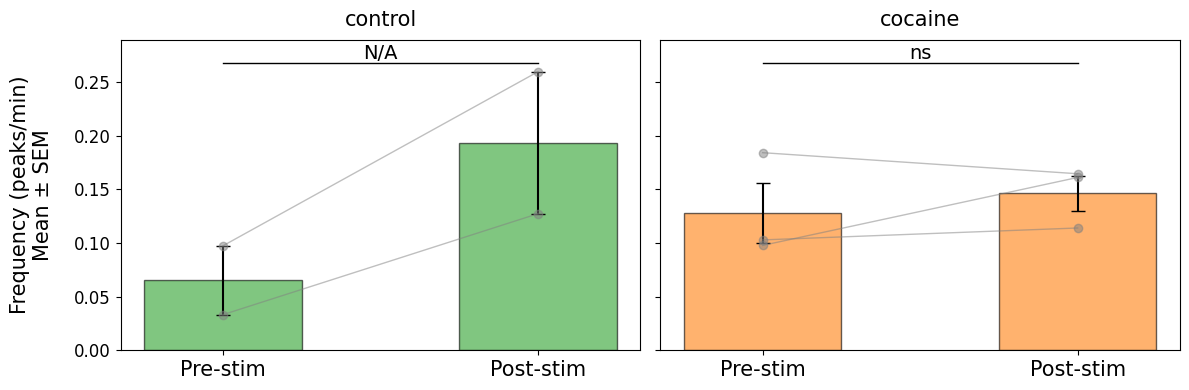

,group,n,mean_diff,normality,test_used,statistic,p_value,significant
0,cocaine,3,0.018265,True,Paired t-test,0.754496,0.529291,False
1,control,2,0.128142,N/A (n < 3),N/A (n < 3),NaN,NaN,False


In [22]:
# only recordings with less severe/no baselinedrift

df_active_cells = df_frequency_analysis_checked_strict[df_frequency_analysis_checked_strict['responsivity'] != 'inactive']
fig,stats = s.plot_frequency_comparison_with_stats(df_active_cells, groupby='treatment', 
                                        figsize=(12, 4), error_type='sem',
                                        show_stats=True, test='ttest_rel', group_order=group_order, group_colors=group_colors)
plt.show()
#fig.savefig('plots/'+'frequency_comparison_cellcultures_ACSF_no_baselinedrift.pdf', bbox_inches='tight', dpi=300)
stats

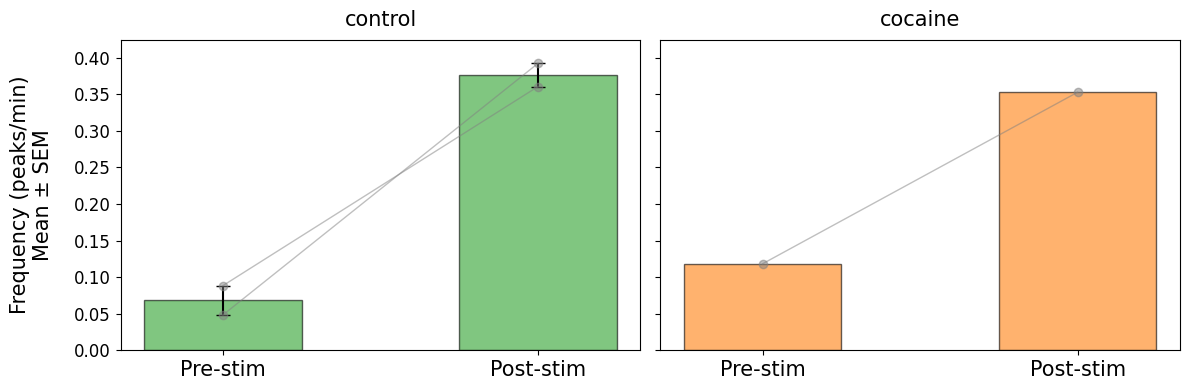

In [23]:
# PBS

df_active_cells = df_frequency_analysis_PBS[df_frequency_analysis_PBS['responsivity'] != 'inactive']
fig,stats = s.plot_frequency_comparison_with_stats(df_active_cells, groupby='treatment', 
                                        figsize=(12, 4), error_type='sem',
                                        show_stats=False, test='ttest_rel', group_order=group_order, group_colors=group_colors)
plt.show()
#fig.savefig('plots/'+'frequency_comparison_cellcultures_PBS.pdf', bbox_inches='tight', dpi=300)
stats

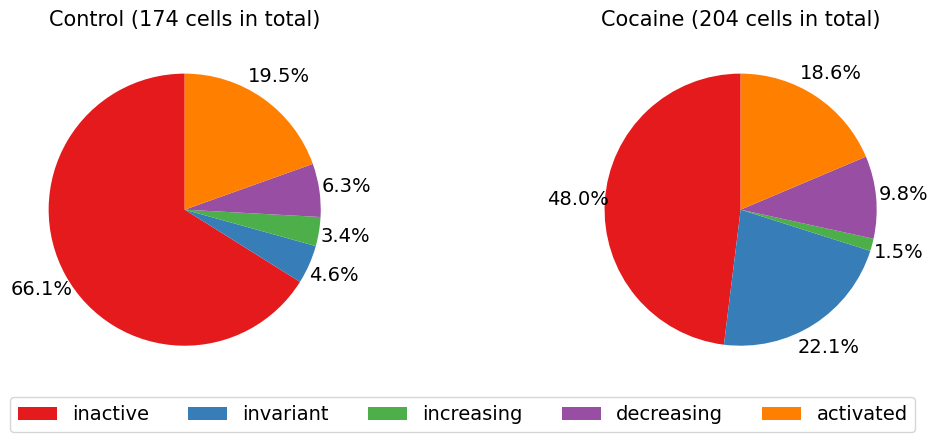

In [109]:
# threshold 100%
df_frequency_analysis_ACSF_checked=s.make_df_frequency_analysis_all (ACSF_wo_technical_issues, df_metadata, params=params_min)
fig = s.make_pie_chart_responsivity(df_frequency_analysis_ACSF_checked,figsize=(12,4),pctdistance=1.2)
#fig.savefig('plots/'+'proportions_responsivity_cellcultures_ACSF_100pct.pdf', bbox_inches='tight', dpi=300)
plt.show()

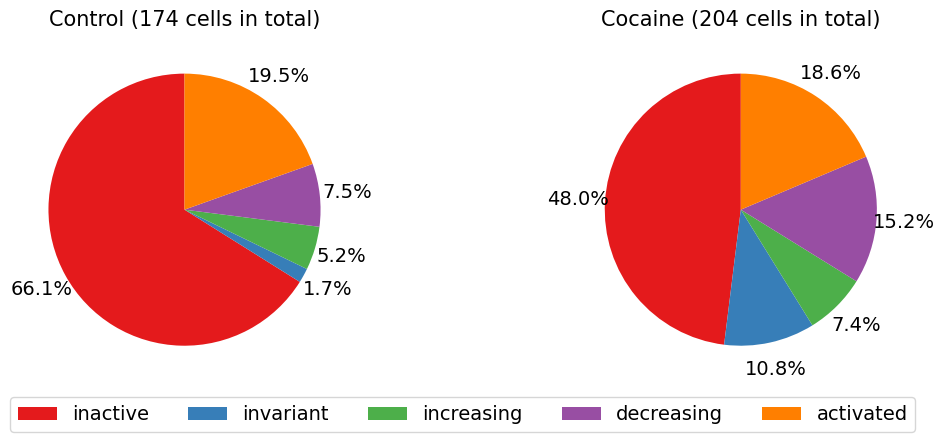

In [107]:
# threshold 30%
df_frequency_analysis_ACSF_checked=s.make_df_frequency_analysis_all (ACSF_wo_technical_issues, df_metadata, params=params_min)
fig = s.make_pie_chart_responsivity(df_frequency_analysis_ACSF_checked,figsize=(12,4),pctdistance=1.2)
#fig.savefig('plots/'+'proportions_responsivity_cellcultures_ACSF_30pct.pdf', bbox_inches='tight', dpi=300)
plt.show()

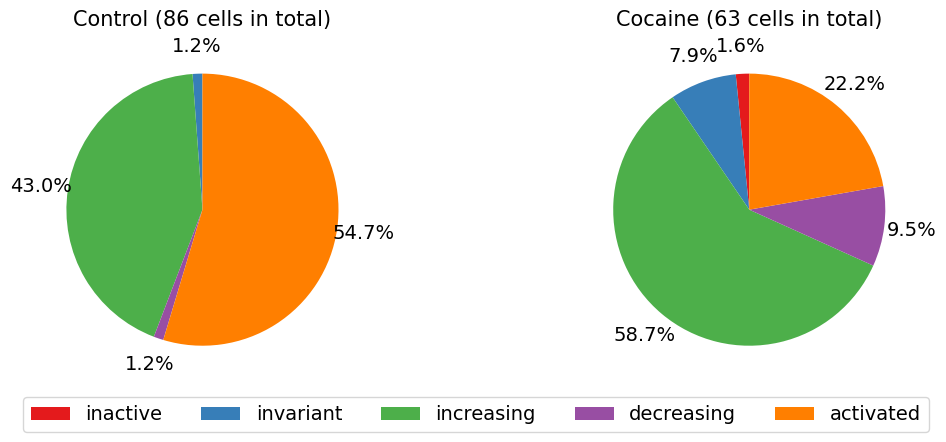

In [8]:
# PBS, threshold 30%
df_frequency_analysis_PBS=s.make_df_frequency_analysis_all (PBS_files, df_metadata, params=params_min)
fig = s.make_pie_chart_responsivity(df_frequency_analysis_PBS, figsize=(12,4),pctdistance=1.2)
#fig.savefig('plots/'+'proportions_responsivity_cellcultures_PBS_30pct.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Example traces

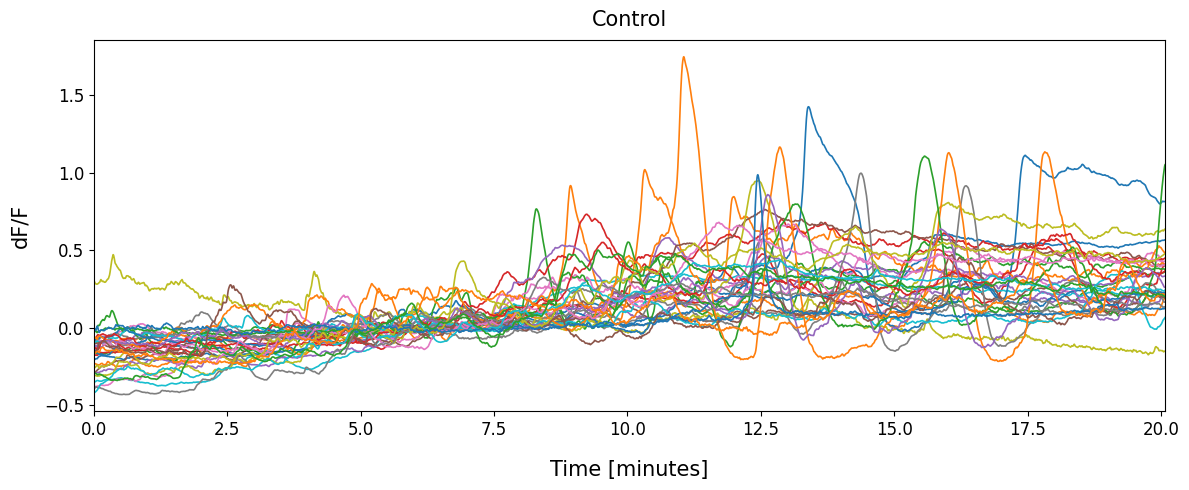

In [5]:
file_control_slide72 = 'data/cell_culture/ACSF_wo_technical_issues/090725_con_astro_striatum_ACSF_slide72_region1_intensities.csv'
df_intensities_norm=s.make_df_intensities_normalized(file_control_slide72,df_metadata,percentile=30,sigma=3,normalization='dF/F')

fig=s.plot_traces_of_recording_thesis(df_intensities_norm,file_control_slide72,df_metadata,figsize=(12,5),legend=False,excluded_cells=[],title='Control', ylabel='dF/F')
plt.show()
#fig.savefig('plots/'+'traces_cellculture_ACSF_control_slide72.pdf', bbox_inches='tight', dpi=300)


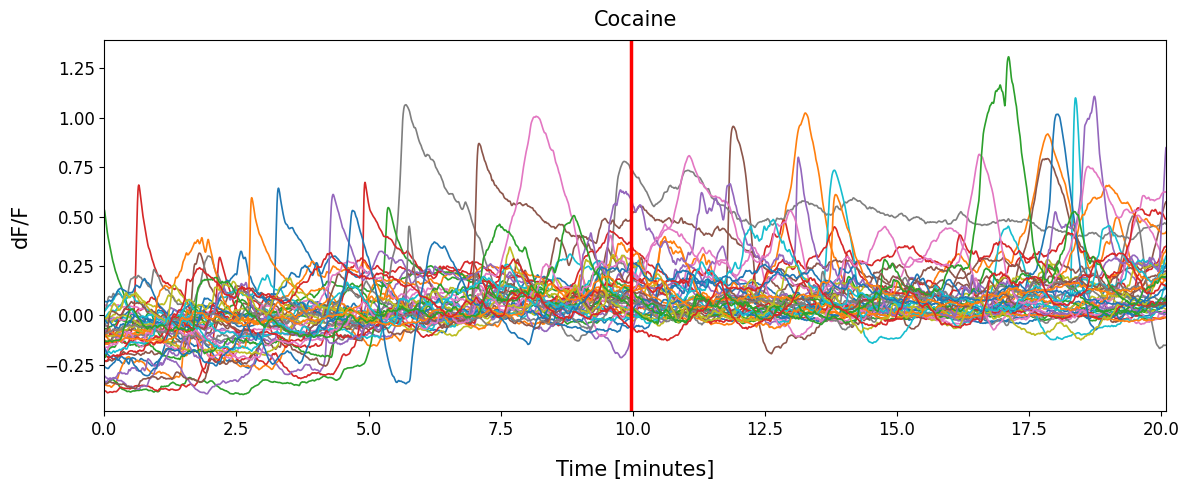

In [6]:
file_control_slide70 = 'data/cell_culture/ACSF_wo_technical_issues/080725_cocaine20uM_astro_striatum_ACSF_slide70_region1_intensities.csv'
df_intensities_norm=s.make_df_intensities_normalized(file_control_slide70,df_metadata,percentile=30,sigma=3,normalization='dF/F')

fig=s.plot_traces_of_recording_thesis(df_intensities_norm,file_control_slide70,df_metadata,figsize=(12,5),legend=False,excluded_cells=[],title='Cocaine', ylabel='dF/F')
plt.show()
#fig.savefig('plots/'+'traces_cellculture_ACSF_cocaine_slide70.pdf', bbox_inches='tight', dpi=300)


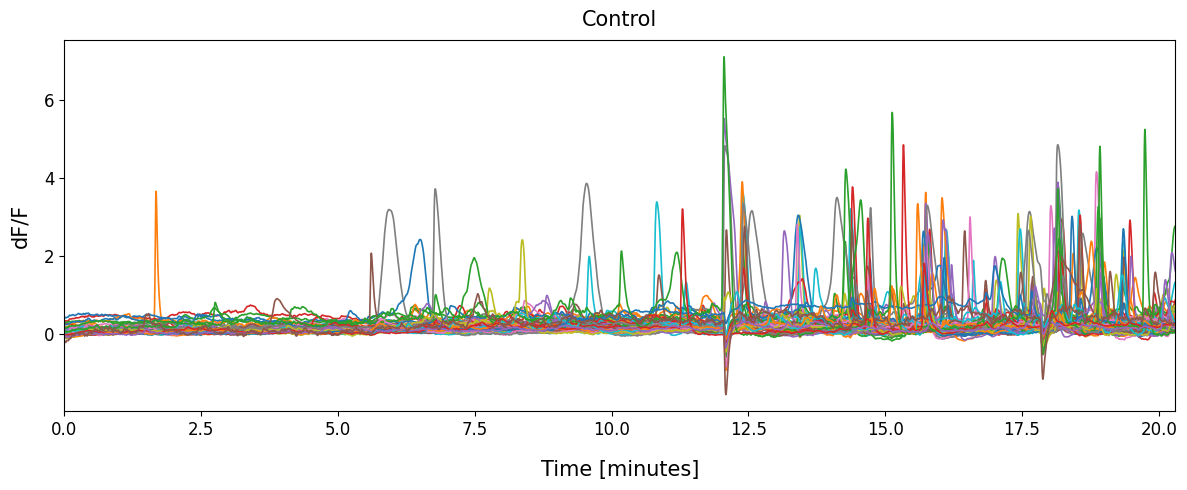

In [6]:
file_control_slide65 = 'data/cell_culture/PBS/120625_control_astro_striatum_PBS_slide65_region1_intensities.csv'
df_intensities_norm=s.make_df_intensities_normalized(file_control_slide65,df_metadata,percentile=5,sigma=3,normalization='dF/F')

fig=s.plot_traces_of_recording_thesis(df_intensities_norm,file_control_slide65,df_metadata,figsize=(12,5),legend=False,excluded_cells=['Mean49'],title='Control', ylabel='dF/F')
plt.show()
#fig.savefig('plots/'+'traces_cellculture_PBS_control_slide65.pdf', bbox_inches='tight', dpi=300)


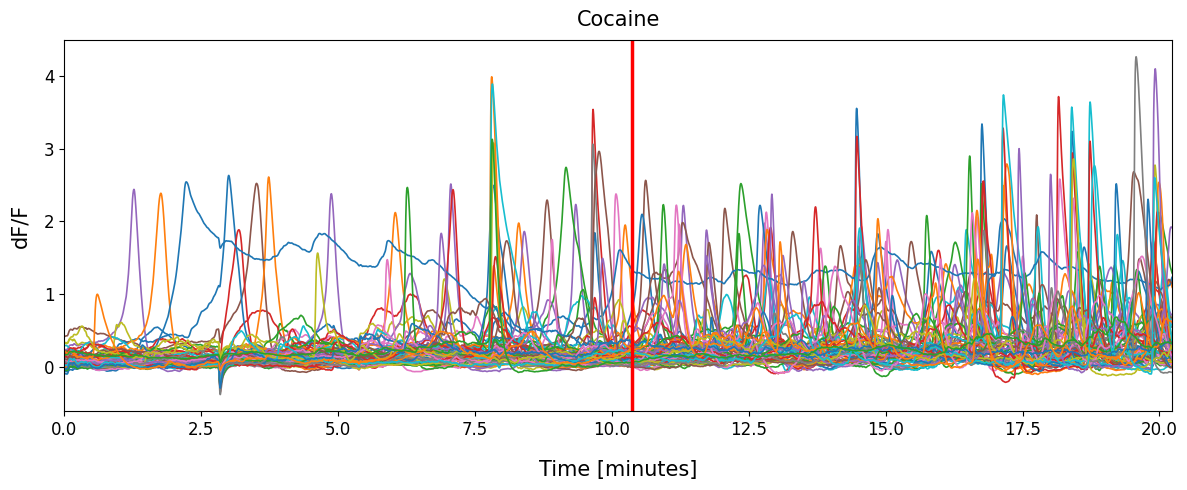

In [8]:
file_cocaine_slide64 = 'data/cell_culture/PBS/120625_cocaine20uM_astro_striatum_PBS_slide64_region1_intensities.csv'
df_intensities_norm=s.make_df_intensities_normalized(file_cocaine_slide64,df_metadata,percentile=5,sigma=3,normalization='dF/F')

fig=s.plot_traces_of_recording_thesis(df_intensities_norm,file_cocaine_slide64,df_metadata,figsize=(12,5),legend=False,title='Cocaine', ylabel='dF/F')
plt.show()
#fig.savefig('plots/'+'traces_cellculture_PBS_cocaine_slide64.pdf', bbox_inches='tight', dpi=300)


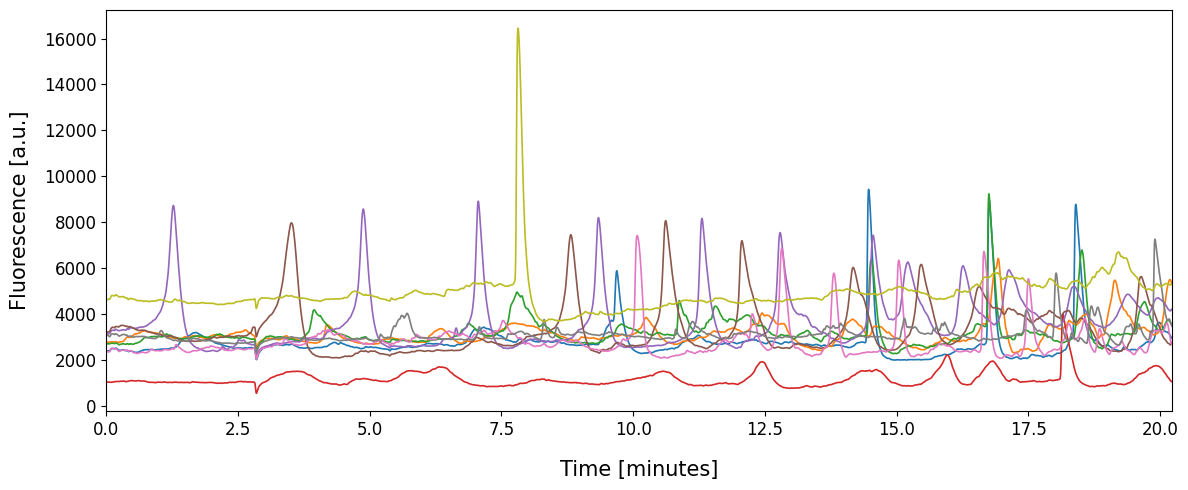

In [10]:
df_filtered_traces=s.make_df_filtered_traces(file_cocaine_slide64,df_metadata,sigma=3)
exclude_cells_64=df_filtered_traces.iloc[:,8:62].columns
fig=s.plot_traces_of_recording_thesis(df_filtered_traces,
                                      file_cocaine_slide64,
                                      df_metadata,
                                      figsize=(12,5),
                                      legend=False,
                                      excluded_cells=exclude_cells_64,
                                      title='',
                                      ylabel='Fluorescence [a.u.]',
                                      show_stim=False)
plt.show()
#fig.savefig('plots/'+'traces_cellculture_PBS_raw_slide64.pdf', bbox_inches='tight', dpi=300)


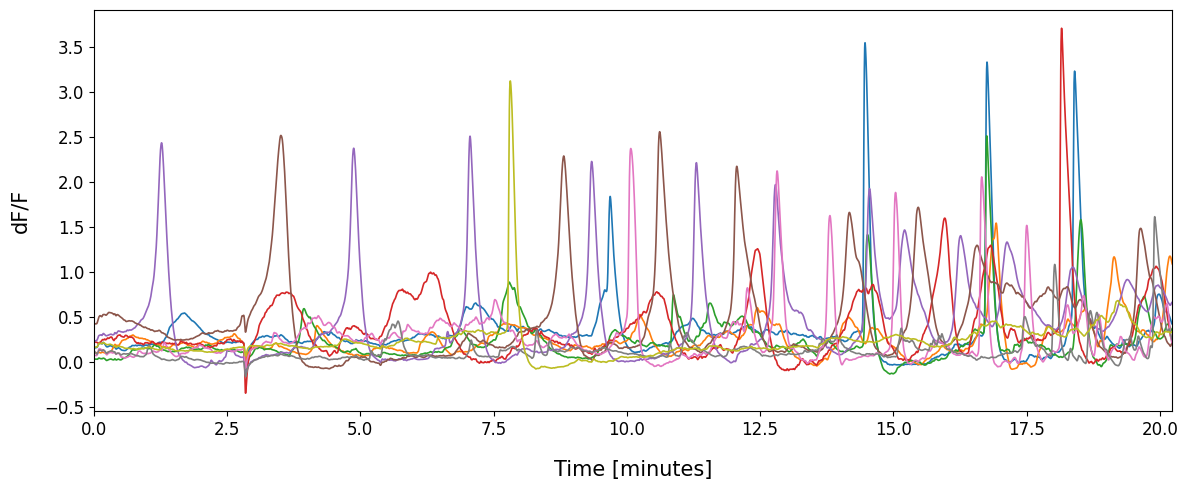

In [11]:
df_intensities_norm=s.make_df_intensities_normalized(file_cocaine_slide64,df_metadata,percentile=5,sigma=3,normalization='dF/F')

fig=s.plot_traces_of_recording_thesis(df_intensities_norm,
                                      file_cocaine_slide64,
                                      df_metadata,
                                      figsize=(12,5),
                                      legend=False,
                                      excluded_cells=exclude_cells_64,
                                      title='',
                                      ylabel='dF/F',
                                      show_stim=False)
plt.show()
#fig.savefig('plots/'+'traces_cellculture_PBS_dfF_slide64.pdf', bbox_inches='tight', dpi=300)


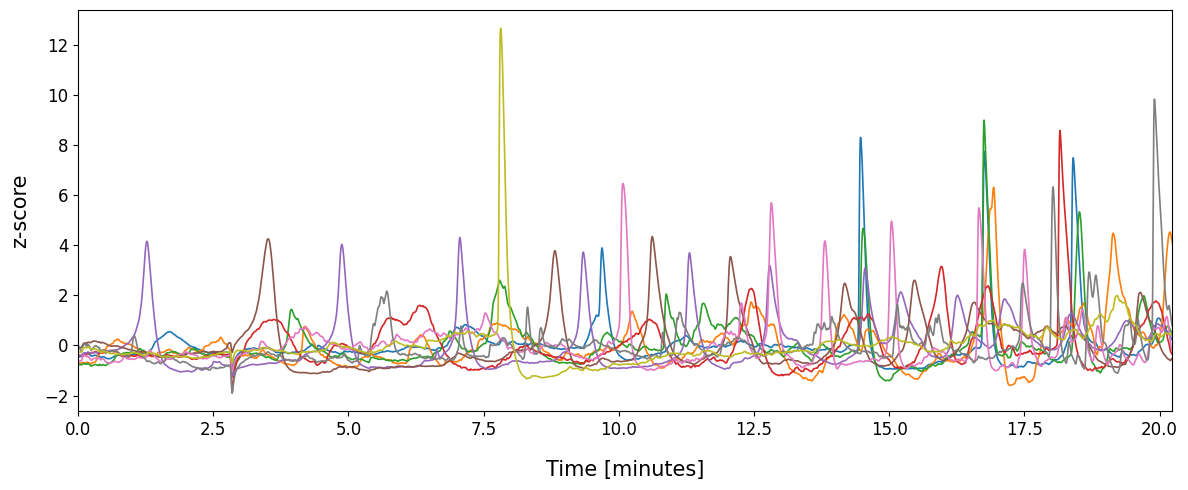

In [13]:
df_intensities_norm=s.make_df_intensities_normalized(file_cocaine_slide64,df_metadata,percentile=10,sigma=3,normalization='z_score')

fig=s.plot_traces_of_recording_thesis(df_intensities_norm,
                                      file_cocaine_slide64,
                                      df_metadata,
                                      figsize=(12,5),
                                      legend=False,
                                      excluded_cells=exclude_cells_64,
                                      title='',
                                      ylabel='z-score',
                                      show_stim=False)
plt.show()
#fig.savefig('plots/'+'traces_cellculture_PBS_zscore_slide64.pdf', bbox_inches='tight', dpi=300)


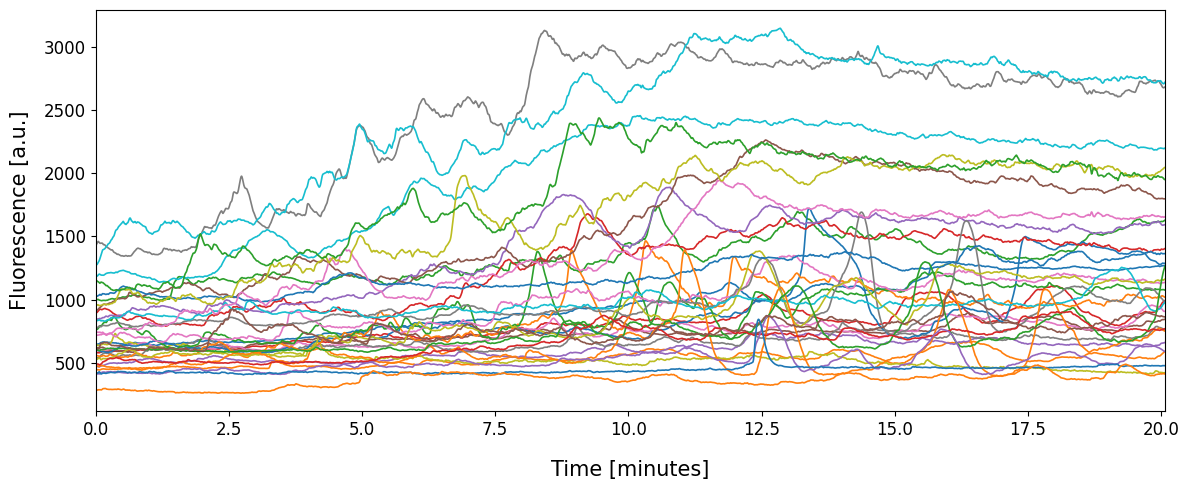

In [16]:
df_filtered_traces=s.make_df_filtered_traces(file_control_slide72,df_metadata,sigma=3)
fig=s.plot_traces_of_recording_thesis(df_filtered_traces,
                                      file_control_slide72,
                                      df_metadata,
                                      figsize=(12,5),
                                      legend=False,
                                      excluded_cells=[],
                                      title='',
                                      ylabel='Fluorescence [a.u.]',
                                      show_stim=False)
plt.show()
#fig.savefig('plots/'+'traces_cellculture_ACSF_raw_slide72.pdf', bbox_inches='tight', dpi=300)

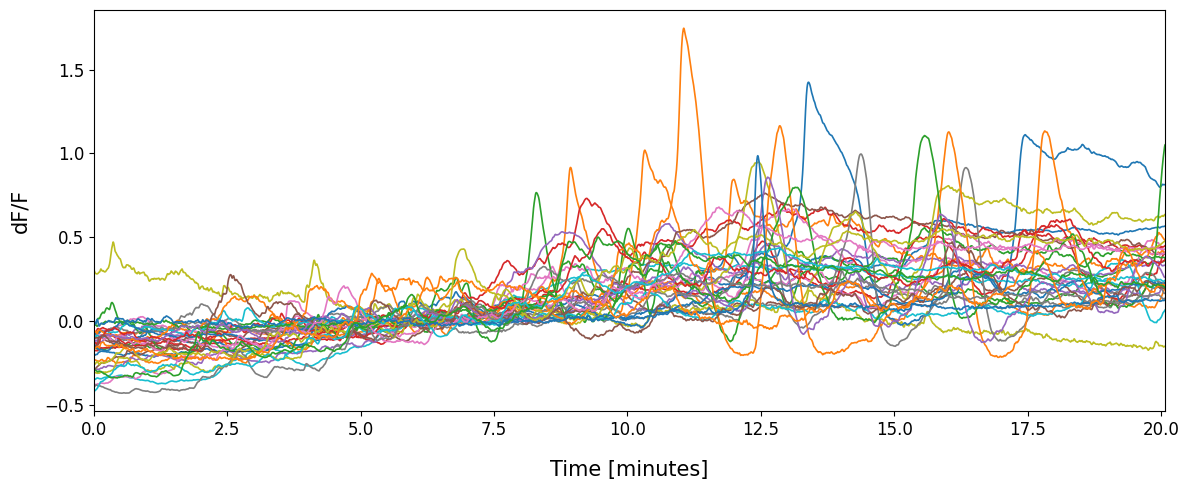

In [19]:
df_intensities_norm=s.make_df_intensities_normalized(file_control_slide72,df_metadata,percentile=30,sigma=3,normalization='dF/F')

fig=s.plot_traces_of_recording_thesis(df_intensities_norm,
                                      file_control_slide72,
                                      df_metadata,
                                      figsize=(12,5),
                                      legend=False,
                                      excluded_cells=[],
                                      title='',
                                      ylabel='dF/F',
                                      show_stim=False)
plt.show()
#fig.savefig('plots/'+'traces_cellculture_ACSF_dfF_slide72.pdf', bbox_inches='tight', dpi=300)

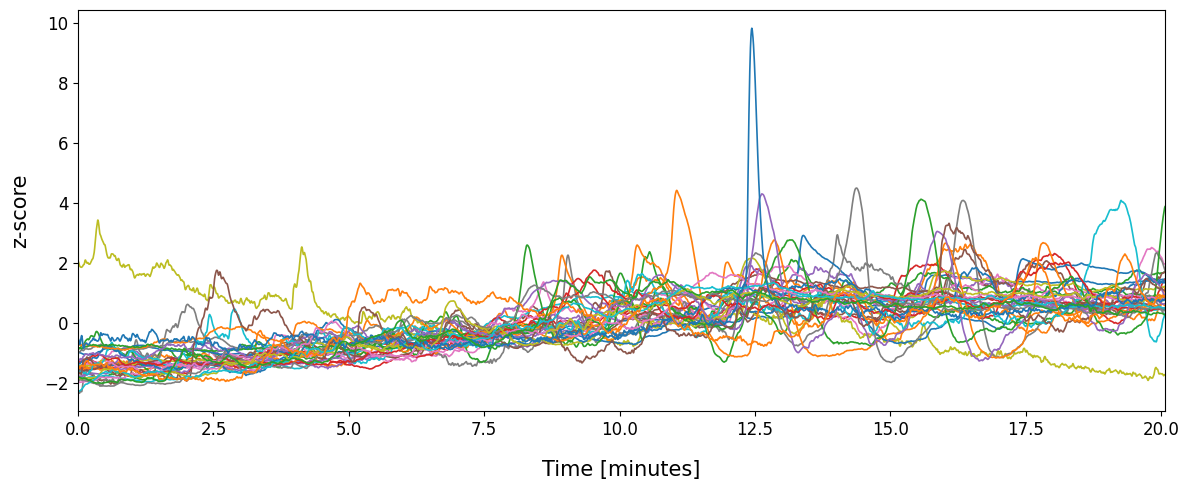

In [17]:
df_intensities_norm=s.make_df_intensities_normalized(file_control_slide72,df_metadata,percentile=5,sigma=3,normalization='z_score')

fig=s.plot_traces_of_recording_thesis(df_intensities_norm,
                                      file_control_slide72,
                                      df_metadata,
                                      figsize=(12,5),
                                      legend=False,
                                      excluded_cells=[],
                                      title='',
                                      ylabel='z-score',
                                      show_stim=False)
plt.show()
#fig.savefig('plots/'+'traces_cellculture_ACSF_zscore_slide72.pdf', bbox_inches='tight', dpi=300)

## Inspect multiple recordings

In [ ]:
for file in ACSF_wo_technical_issues:
    df_intensities_norm=s.make_df_intensities_normalized(file,df_metadata,percentile=30,sigma=3,normalization='z_score')
    s.plot_traces_of_recording_thesis(df_intensities_norm,file,df_metadata,figsize=(12,5),legend=False,excluded_cells=[],title='filename', ylabel='z-score')
    